In [1]:
%matplotlib inline
import numpy as np 

from astropy.table import Table, Column
import astropy.units as u
import astropy.constants as const

import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams['font.family'] = 'stixgeneral'

from glob import glob

In [2]:
use1sig = False
ecolor = plt.cm.Greys(0.6)
color = plt.cm.Greys(0.8)
fs = 16 
al = 1

ions = ['HI', 'CII', 'CIV', 'SiII', 'SiIII', 'SiIV']
ions_eagle = ['h1', 'c2', 'c4', 'si2', 'si3', 'si4']

Read in simulation data from EAGLE 

In [3]:
rlabel = 'useR200m' # 'useR200c'

In [4]:
ions_files = {}
eagle_temp = 'data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_{}.dat/rlinprof/'.format(rlabel)

import glob
for i, ion_label in enumerate(ions_eagle): 
    model_file = glob.glob('{}/*{}*'.format(eagle_temp, ion_label))
    if len(model_file) == 1:
        ions_files[ions[i]] = model_file[0]
    print(ion_label, model_file)

h1 ['data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_useR200m.dat/rlinprof/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000.150kpc.sh.h1_rlinprof.dat']
c2 ['data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_useR200m.dat/rlinprof/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000.150kpc.sh.c2_rlinprof.dat']
c4 ['data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_useR200m.dat/rlinprof/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000.150kpc.sh.c4_rlinprof.dat']
si2 ['data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_useR200m.dat/rlinprof/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000.150kpc.sh.si2_rlinprof.dat']
si3 ['data/eagle/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000p000_useR200m.dat/rlinprof/coldens.run_makefigs_subfind_L012N0376_eagle.NEQ.snap023.056_z000

In [5]:
model_tb = Table.read(ions_files['HI'], format='ascii')
model_tb.show_in_notebook()

idx,rbins,bin1_median,bin1_lo,bin1_hi,bin1_mean,bin2_median,bin2_lo,bin2_hi,bin2_mean,bin3_median,bin3_lo,bin3_hi,bin3_mean
0,0.05,15.37,13.57,18.05,17.62,17.8,14.87,19.29,18.91,19.16,17.05,19.82,19.53
1,0.15,13.66,13.11,14.16,14.25,14.49,13.74,16.03,16.68,16.36,14.88,18.03,18.07
2,0.25,13.35,12.89,13.8,13.58,14.21,13.51,14.83,15.14,15.07,14.23,16.09,16.07
3,0.35,13.24,12.73,13.77,13.53,14.07,13.42,14.47,15.9,14.5,13.95,15.26,15.26
4,0.45,13.21,12.68,13.74,15.87,13.97,13.36,14.28,15.94,14.2,13.77,14.75,14.52
5,0.55,13.16,12.61,13.71,13.5,13.89,13.38,14.17,14.79,14.03,13.66,14.55,15.45
6,0.65,13.17,12.62,13.71,15.08,13.79,13.32,14.09,14.06,13.91,13.55,14.39,15.05
7,0.75,13.17,12.59,13.71,13.5,13.71,13.3,14.02,15.49,13.85,13.49,14.24,15.62
8,0.85,13.13,12.59,13.71,13.45,13.62,13.25,13.96,13.96,13.72,13.43,14.2,14.97
9,0.95,13.12,12.56,13.66,13.43,13.61,13.25,13.92,14.51,13.65,13.32,14.03,15.96


Plot data 

In [6]:
def add_model(ax, ion): 
    model_tb = Table.read(ions_files[ion], format='ascii')
    from load_cgm_dwarf_mod import eagle_model_color
    bins, bin_colors, bin_als, bin_labels, bin_ranges = eagle_model_color()
    
    for ibin in range(3): 
        bin_key = bins[ibin]
        ax.fill_between(model_tb['rbins'], model_tb[bin_key+'_lo'], 
                        model_tb[bin_key+'_hi'], color=bin_colors[ibin], alpha=bin_als[ibin], 
                        edgecolor='none', label=bin_labels[ibin])
        ax.plot(model_tb['rbins'], model_tb[bin_key+'_median'], color=bin_colors[ibin], lw=2)
        #if ion == 'HI': 
        #    ax.legend(loc='lower left', fontsize=8, frameon=False, labelspacing=0.05, 
        #              bbox_to_anchor=(-0.01, -0.01))
    return ax

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


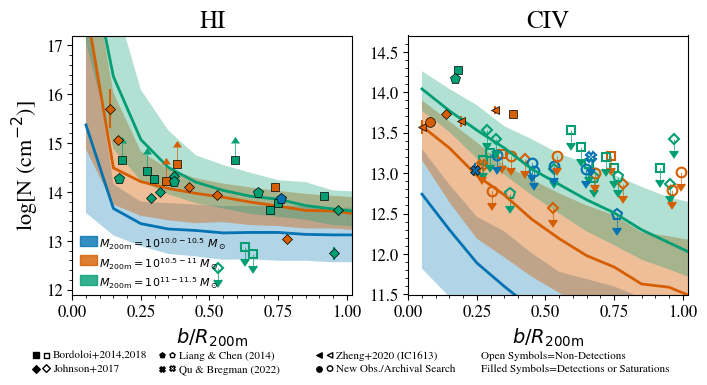

In [7]:
from load_cgm_dwarf_mod import init_logN_rho_plot_2panel
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

ions = ['HI', 'CIV']
fig, axes, ylims = init_logN_rho_plot_2panel(fs=fs, ions=ions)
for j in range(len(ions)): 
    ion = ions[j]
    ax = axes[j]
    
    # add empirical model 
    ax = add_model(ax, ion)
    
    ### add data 
    ax, file_label = plot_obsdata(ax, ion, use1sig=use1sig, 
                                  ecolor=ecolor, color=color, 
                                  fs=fs, al=al, 
                                  add_legend_byhand=True)
    
    ## add legend
    #ytext = ylims[ion][file_label][1] - 0.15*(ylims[ion][file_label][1] - ylims[ion][file_label][0])
    #ax.text(0.8, ytext, ion, fontsize=fs+2)
    ax.set_title(ion, fontsize=fs+2)
    ax.set_xlabel(r'$b/R_{\rm 200m}$', fontsize=fs-2)
    ax.set_ylim(ylims[ion][file_label][0], ylims[ion][file_label][1])
    #ax.axvline(0.1)

#ax_ll = axes[-1]
#ax_ll.legend(loc='upper right', fontsize=fs-5)
fig.savefig('figs/fig8_eagle_logN_allions_{}_color_{}_2panel.pdf'.format(file_label, rlabel))

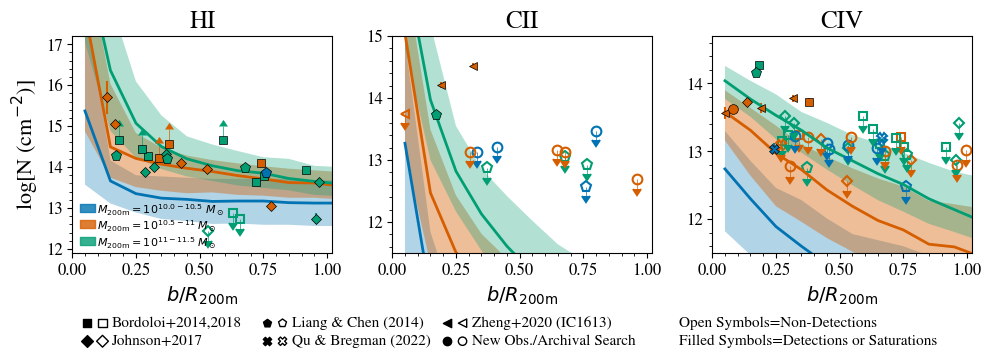

In [8]:
from load_cgm_dwarf_mod import init_logN_rho_plot_3panel
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

ions = ['HI', 'CII', 'CIV']
fig, axes, ylims = init_logN_rho_plot_3panel(fs=fs, ions=ions)
for j in range(len(ions)): 
    ion = ions[j]
    ax = axes[j]
    
    # add empirical model 
    ax = add_model(ax, ion)
    
    ### add data 
    ax, file_label = plot_obsdata(ax, ion, use1sig=use1sig, 
                                  ecolor=ecolor, color=color, 
                                  fs=fs, al=al, 
                                  add_legend_byhand=True)
    
    ## add legend
    #ytext = ylims[ion][file_label][1] - 0.15*(ylims[ion][file_label][1] - ylims[ion][file_label][0])
    #ax.text(0.8, ytext, ion, fontsize=fs+2)
    ax.set_title(ion, fontsize=fs+2)
    ax.set_xlabel(r'$b/R_{\rm 200m}$', fontsize=fs-2)
    ax.set_ylim(ylims[ion][file_label][0], ylims[ion][file_label][1])
    #ax.axvline(0.1)

#ax_ll = axes[-1]
#ax_ll.legend(loc='upper right', fontsize=fs-5)
fig.savefig('figs/fig8_eagle_logN_allions_{}_color_{}_3panel.pdf'.format(file_label, rlabel))

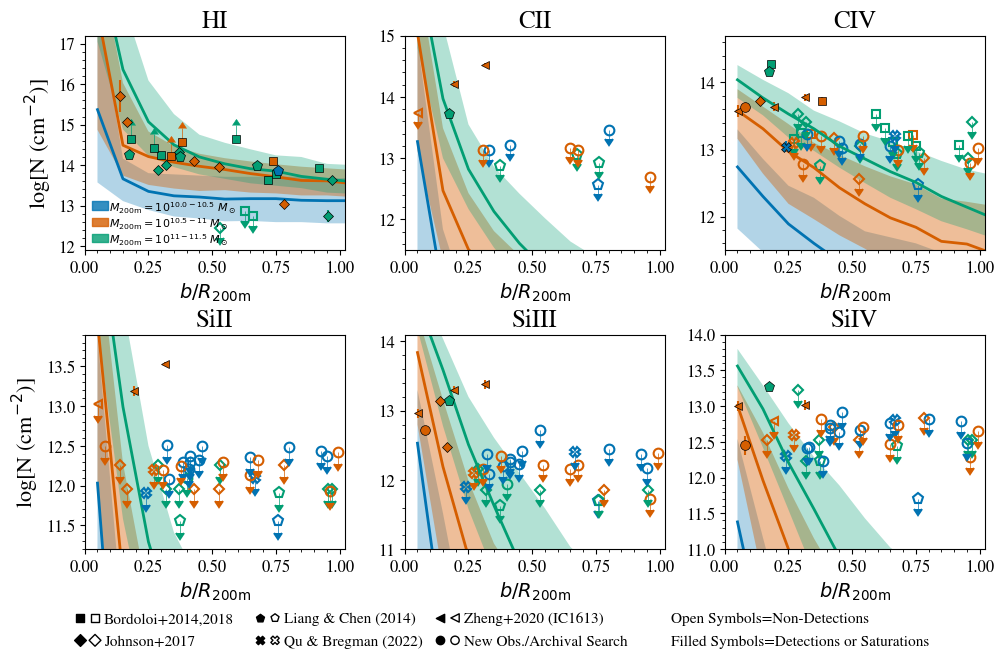

In [9]:
from load_cgm_dwarf_mod import init_logN_rho_plot_6panel
from load_cgm_dwarf_mod import read_ion_measurements_logN, plot_obsdata

ions = ['HI', 'CII', 'CIV', 'SiII', 'SiIII', 'SiIV']
fig, axes, ylims = init_logN_rho_plot_6panel(fs=fs, ions=ions)
for j in range(len(ions)): 
    ion = ions[j]
    ax = axes[j]
    
    # add empirical model 
    ax = add_model(ax, ion)
    
    ### add data 
    ax, file_label = plot_obsdata(ax, ion, use1sig=use1sig, 
                                  ecolor=ecolor, color=color, 
                                  fs=fs, al=al, 
                                  add_legend_byhand=True)
    
    ## add legend
    #ytext = ylims[ion][file_label][1] - 0.15*(ylims[ion][file_label][1] - ylims[ion][file_label][0])
    #ax.text(0.8, ytext, ion, fontsize=fs+2)
    ax.set_title(ion, fontsize=fs+2)
    ax.set_xlabel(r'$b/R_{\rm 200m}$', fontsize=fs-2)
    ax.set_ylim(ylims[ion][file_label][0], ylims[ion][file_label][1])
    #ax.axvline(0.1)

#ax_ll = axes[-1]
#ax_ll.legend(loc='upper right', fontsize=fs-5)
fig.savefig('figs/fig8_eagle_logN_allions_{}_color_{}_6panel.pdf'.format(file_label, rlabel))